## Problem :  Decision Tree Classification
---
Build a classification model based on Decision trees to classify the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) , plit the data to 70% training set and 30% testing set and report the training and testing accuracy.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
!pip install graphviz

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [25]:
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus

In [26]:
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Training\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


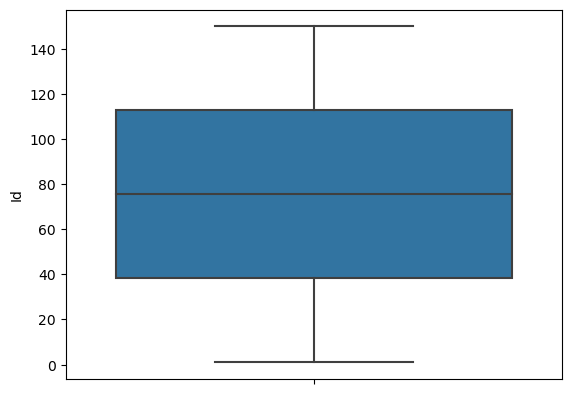

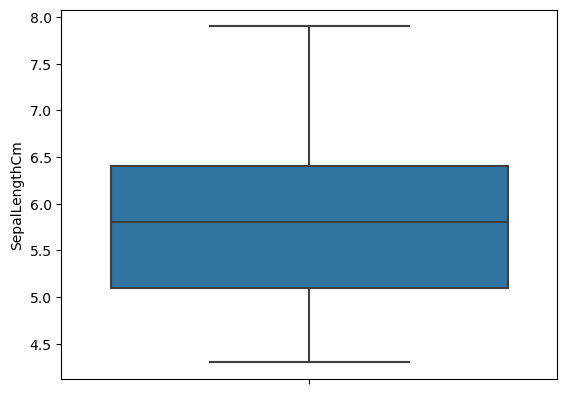

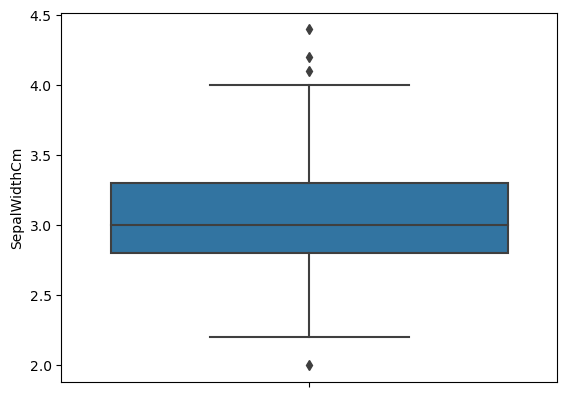

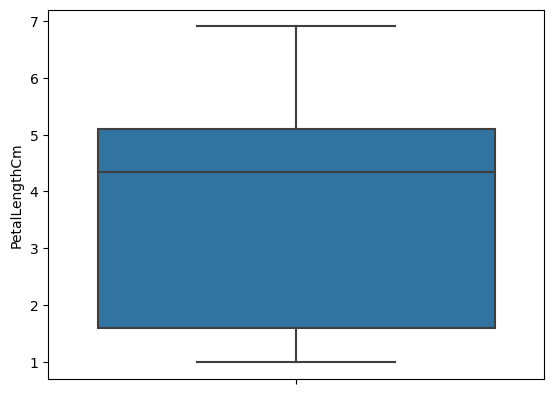

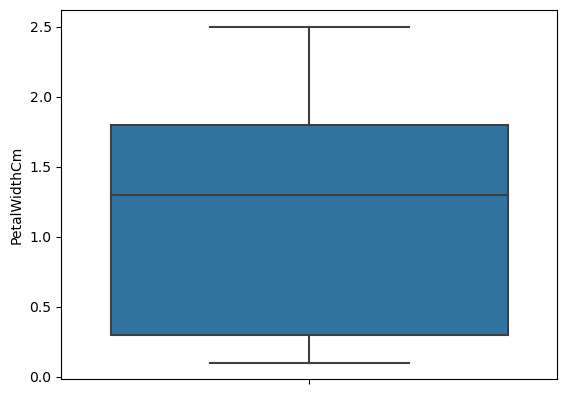

In [34]:
cols = df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()


In [36]:
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape 

(146, 6)

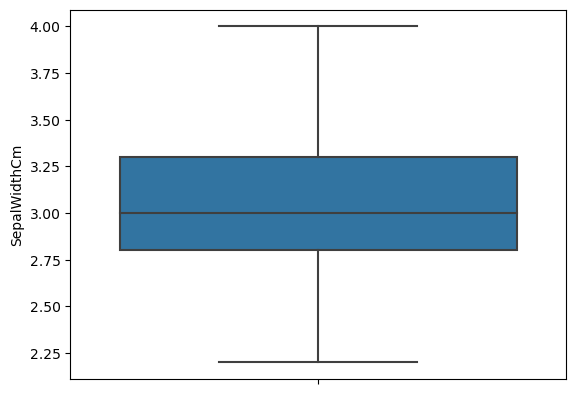

In [37]:
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('Species',axis=1)
y = df[['Species']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(random_state=1,max_depth=3, min_samples_leaf=10)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

In [30]:
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus




In [31]:
# import sklearn.datasets as datasets
# # from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz

# import pandas as pd
# import pydotplus

# from IPython.display import Image

In [32]:
target = list(df['Species'].unique())
feature_names = list(X.columns)

In [33]:
# from sklearn import tree
# import graphviz

features = X.columns
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph

InvocationException: GraphViz's executables not found

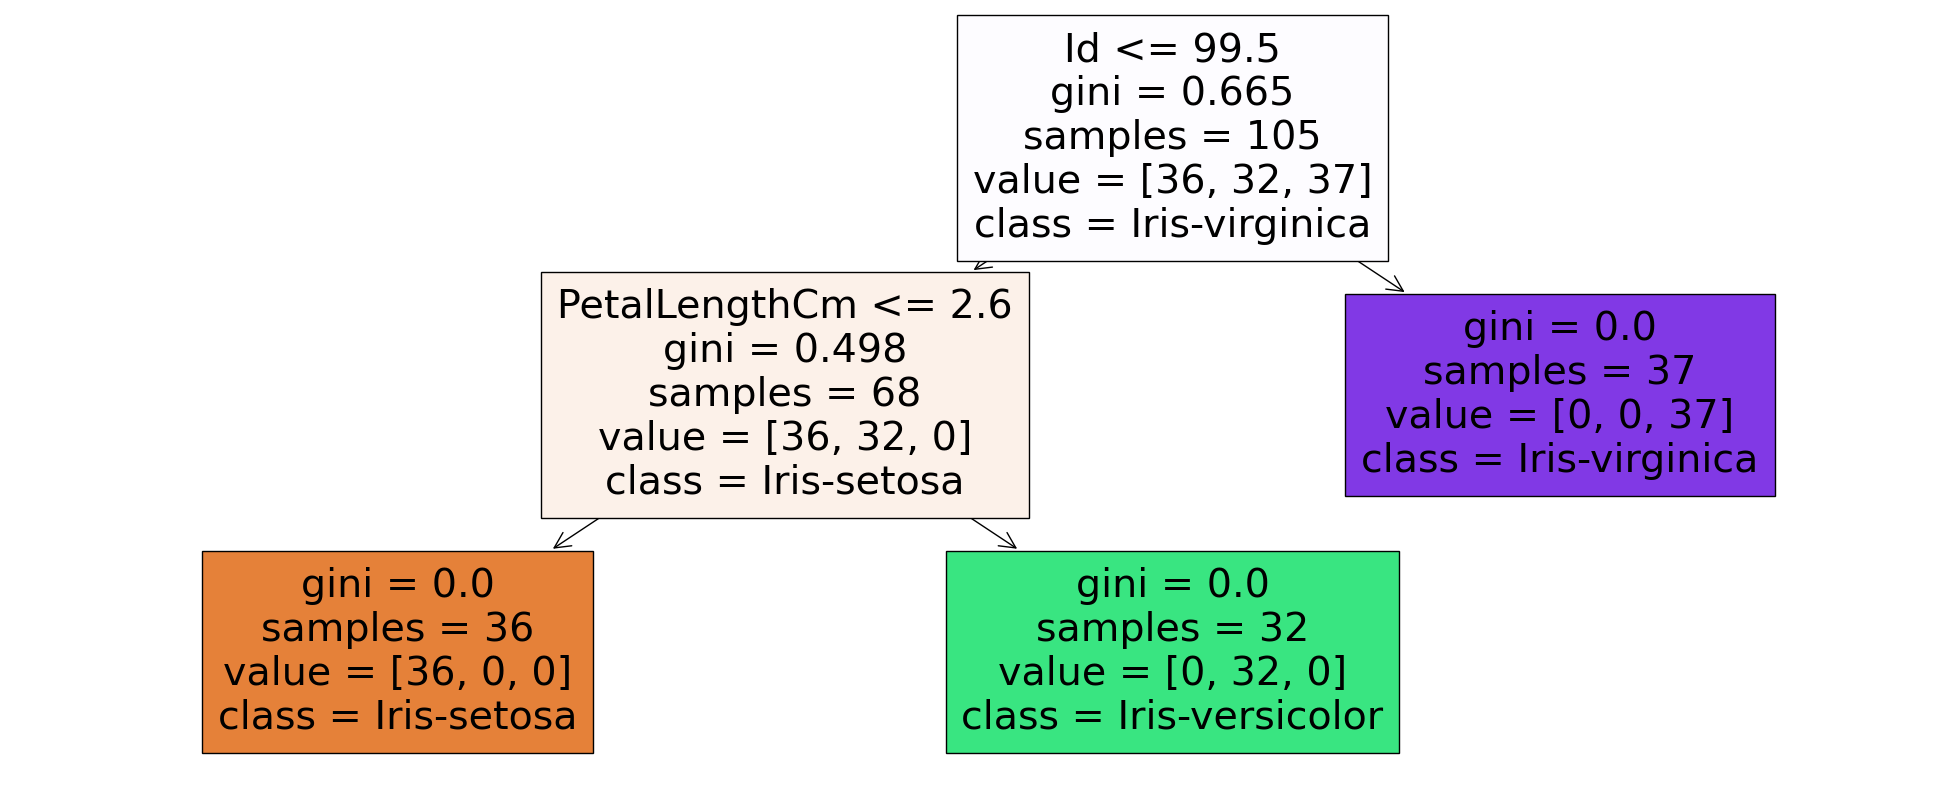

In [38]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf_model,
                   feature_names=feature_names,
                   class_names=target,
                   filled=True)

In [39]:
y_predict = clf_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.9777777777777777